# Question 5,6,7,8

In [45]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

% matplotlib inline

### Convolution Layer

In [46]:
###### convolution Layer ###########
def conv(k_size,nk,pad,s,image):
    img = np.asarray(image) # RGB image in a 3D array
    

    # kernel generation
    
    kernel = {}
    for i in range(nk):
        z = np.random.rand(k_size,k_size,img.shape[2])
        kernel[i] = z

    # image padding , stride
    b = []
    for i in range(nk):   # biases
        z = 0 
        b = np.append(b,z)

    w,h,c = img.shape
    
    ow = int(((w - k_size + (2*pad)) / s) + 1)
    oh = int(((h - k_size + (2*pad)) / s) + 1)
    oc = len(img[2])

    kl = len(kernel[0])
    out = np.zeros((ow,oh,k_size))

    # image padding
    padimg = np.zeros((w+(2*pad),h+(2*pad),c))
    for i in range(c):
        padimg[:,:,i] = np.pad(img[:,:,i],((pad,pad),(pad,pad)),"constant")
   
    # convolution 
    for z in range(nk):
        for i,j in zip(range(0,ow),range(0,w,s)):
            for k,l in zip(range(0,oh),range(0,h,s)):
                out[i,k,z] = np.sum(padimg[0+j:kl+j,0+l:kl+l,:] * kernel[z]) + b[z]

    # Activation Layer
    #ReLU
    act = np.zeros((ow,oh,nk))
    for i in range(nk):
        act[:,:,i] = np.maximum(0,out[:,:,i])
        plt.imshow(act[:,:,i])
        plt.show()
    return act
        

### pooling layer

In [47]:
############ Pooling layer ##########
def pooling(nk,n):
    nkp = int(input("Enter pooling size : "))
    
    # calculating pooling output size
    ss = int(input("Enter strides in pooling : "))
    pw = int(((n.shape[1] - nkp ) / ss) + 1)
    ph = int(((n.shape[0] - nkp ) / ss) + 1)
    pool = np.zeros((pw,ph,nk))
    for z in range(nk):
        for i,j in zip(range(0,pw),range(0,n.shape[1],ss)):
            for k,l in zip(range(0,ph),range(0,n.shape[0],ss)):
                pool[i,k,z] = np.mean(n[0+j:nkp+j,0+l:nkp+l])
        
    e = pool
    for i in range(nk):
        plt.imshow(e[:,:,i])
        plt.suptitle("map after pooling")
        plt.show()
    return e
    

### Unravelling

In [48]:
def unravel(m,im,cc):
    un = im[cc]
    un = np.reshape(un,(-1,1))
    print("size after unraveling : ",np.shape(un))

    f = int(input("Enter the no. of inputs to MLP : "))
    w = np.zeros((f,un.shape[0]))

    fc = np.dot(w,un)
    print("input of MLP",np.shape(fc))
    return fc


### Multi - Layer Perceptron

In [49]:
def mlp(unr):
    # creating hidden layer
    hid = int(input("Enter the no. of hidden layers : "))
    layer ={}
    layer[0] = unr.shape[0]
    for i in range(1,hid+1):
        a = int(input("Enter the size of hidden layer %d : "% (i)))
        layer[i] = a
    opl =  int(input(" Enter the size of output layer : "))
    layer[hid+1] = opl

    # Weight and Bias initialization
    weight = {}
    bias = {}
    for i in range(hid+1):
        weight[i] = np.random.rand(layer[i+1],layer[i])
        bias[i] = np.zeros((layer[i+1],1))

    # storing hidden and output layer output
    hido = {}
    hido[0] = unr

    # Layer operations (and non linearity)
    for i in range(1,hid+1):
        hido[i] = np.maximum(0,(np.dot(weight[i-1],hido[i-1]) + bias[i-1]))

    hido[hid + 1] = (np.dot(weight[hid],hido[hid]) + bias[hid])

    # Output Layer
    output = hido[hid + 1]

    # Applying softmax to Output layer
    soft = np.exp(output) / np.sum(np.exp(output))
    print("Output vector size : ",soft.shape)
    return
    

Enter the no. of convolution layers : 2
convolution layer :  1
enter size of kernel Q x Q : 4
enter no. of kernels : 2
enter padding : 2
stride : 2
Map after convolution  :  1


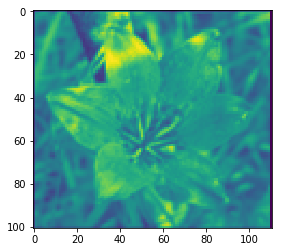

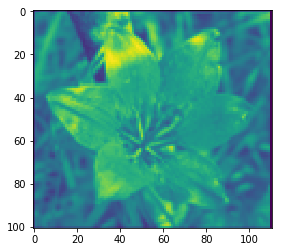

Enter pooling size : 4
Enter strides in pooling : 2


C:\Users\RAJAT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\RAJAT\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


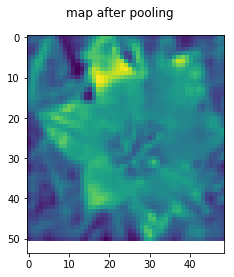

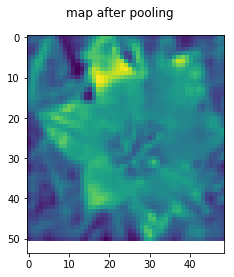

convolution layer :  2
enter size of kernel Q x Q : 3
enter no. of kernels : 3
enter padding : 2
stride : 2
Map after convolution  :  2


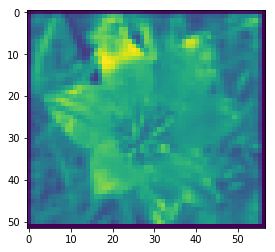

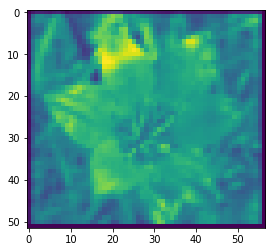

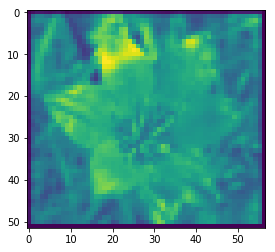

Enter pooling size : 4
Enter strides in pooling : 2


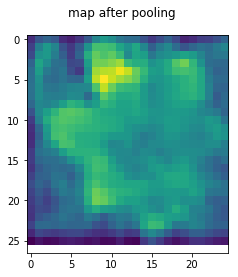

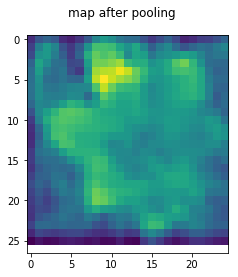

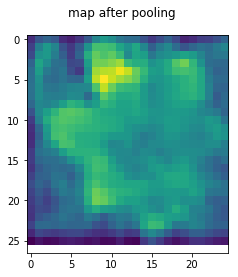

size after unraveling :  (8892, 1)
Enter the no. of inputs to MLP : 1024
input of MLP (1024, 1)
Enter the no. of hidden layers : 2
Enter the size of hidden layer 1 : 700
Enter the size of hidden layer 2 : 300
 Enter the size of output layer : 100
Output vector size :  (100, 1)
None


In [50]:
# image loading
image = Image.open('flower.jpg')
im = {}
im[0] = image
############ Compostion of Connvolution Layers##############
cc = int(input("Enter the no. of convolution layers : "))

for i in range(1,cc+1):
    print("convolution layer : ",i )
    # taking input from users
    k_size = int(input("enter size of kernel Q x Q : "))
    nk = int(input("enter no. of kernels : "))
    pad = int(input("enter padding : "))
    s = int(input("stride : "))
    
    print("Map after convolution  : ",i)
    # calling conv function
    im[i] = conv(k_size,nk,pad,s,image = im[i - 1])

    # calling pooling function 
    m = pooling(nk,im[i])
    
# calling unravel function
unr = unravel(m,im,cc)
    
# Calling MLP function
final = mlp(unr)
print(final)